In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_rmsd(a, b):
    return (((a-b)**2).mean())**0.5

def derivative_1(f, fp, dx):
    # forward first order
    res = (fp - f) / dx
    return res

def derivative_2(fp, fm, dx):
    # Central second order
    res = (fp - fm)/(2*dx)
    return res

def derivative_3(f2p, fp, fm, f2m, dx):
    # Central fourth order
    res = (-f2p + 8*fp - 8*fm + f2m)/(12*dx)
    return res


def f(x):
    return np.sin(x)
def df(x):
    return np.cos(x)

In [3]:
s_x = -100.0
e_x = 100.0
n_x = 1000

pow = np.arange(-2.0, -8, -0.05)
DX = 10**pow

RMSD1 = []
RMSD2 = []
RMSD3 = []

In [4]:
for dx in DX:
    X = np.random.uniform(low=s_x, high=e_x, size=(n_x,))
    Xp = X + dx
    Xm = X - dx
    X2p = X + 2*dx
    X2m = X - 2*dx

    Y = f(X)
    Yp = f(Xp)
    Ym = f(Xm)
    Y2p = f(X2p)
    Y2m = f(X2m)
    dY = df(X)

    U1 = derivative_1(Y, Yp, dx)
    U2 = derivative_2(Yp, Ym, dx)
    U3 = derivative_3(Y2p, Yp, Ym, Y2m, dx)

    RMSD1.append(calc_rmsd(dY, U1))
    RMSD2.append(calc_rmsd(dY, U2))
    RMSD3.append(calc_rmsd(dY, U3))

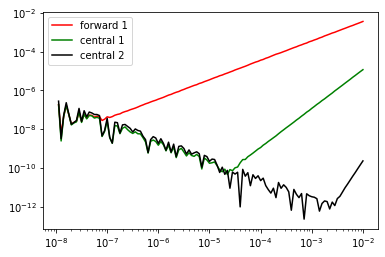

In [5]:
plt.plot(DX, RMSD1, c='r', label = 'forward 1')
plt.plot(DX, RMSD2, c='g', label = 'central 1')
plt.plot(DX, RMSD3, c='k', label = 'central 2')
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.show()